# A-4 - Skyhawk Roll Performance

From a Linkedin post by Elliot Seguin - [https://www.linkedin.com/posts/elliot-seguin-ba2a6434_testpilot-fly-aviation-ugcPost-6887428405525139457-o5co/](https://www.linkedin.com/posts/elliot-seguin-ba2a6434_testpilot-fly-aviation-ugcPost-6887428405525139457-o5co/)

> The legendary roll rate of the A-4, is it really that fast? I was told in engineering school an A-4 rolled at 700 degrees per second, roughly twice the roll rate of an F-16. When the opportunity came up to evaluate the A-4 I became pretty focused on this data point.
>
> Talking to the owner, the manual says 720 deg/sec and limits the pilot to one full deflection roll due to roll yaw coupling. Reading online there was speculation that the 720 number had been a misprint in an old A-4 manual and in fact the number was 270 deg per sec. Every A-4 pilot I talked to was quick to compliment the roll rate but no one seemed to have real data. Then we went flying.
>
> The flight was about demonstrating flatline speed so the maneuvering was extra, but we did some rolls. I don’t know that we ever did full deflection rolls but in the videos show you can see a lot of deflection. The video shows a “fast” roll in each direction (speed ~400 KIAS).
>
> We topped out on this flight at 500 Knots, ~100 knots faster than this roll. The airplane is capable of but more speed and likely more deflection, based on that I think 700 deg/s is a real number. What do you think?


From Gordon McClymont's comment on the post.

> So I dug out the final report…The rapid roll test we performed was at 15K/350KIAS/1G/Full stick in 1/4 sec for 360 deg of roll (with empty drop tanks). For Left roll it was 1.68 secs and Right was 1.56 secs. These numbers are similar to your clip. Without taking into account the roll rate acceleration that equates to 230 deg/s. Being generous we could maybe assume a 270 deg/s steady state roll rate.
>
> I agree that at a higher speed and with the drop tanks removed the steady state roll rate may well be increased-but no where near 700 deg/s. I agree 100% with Murcat that these roll rates are most impractical-if not impossible. As with all legendary jet fighters around the world-the tales get taller with the years! The Scooter rolled pretty fast-but not that fast!

15,000ft 350KIAS
Mach 0.69  u0 = 221.604 m/s

## A-4D Aerodynamic Data

Aerodynamic data for the A-4D Skyhawk from [AIRCRAFT STABILITY AND CONTROL DATA By Gary L. Teper April 1969](https://www.robertheffley.com/docs/Data/Teper--NASA_CR-96008.pdf) NASA report.

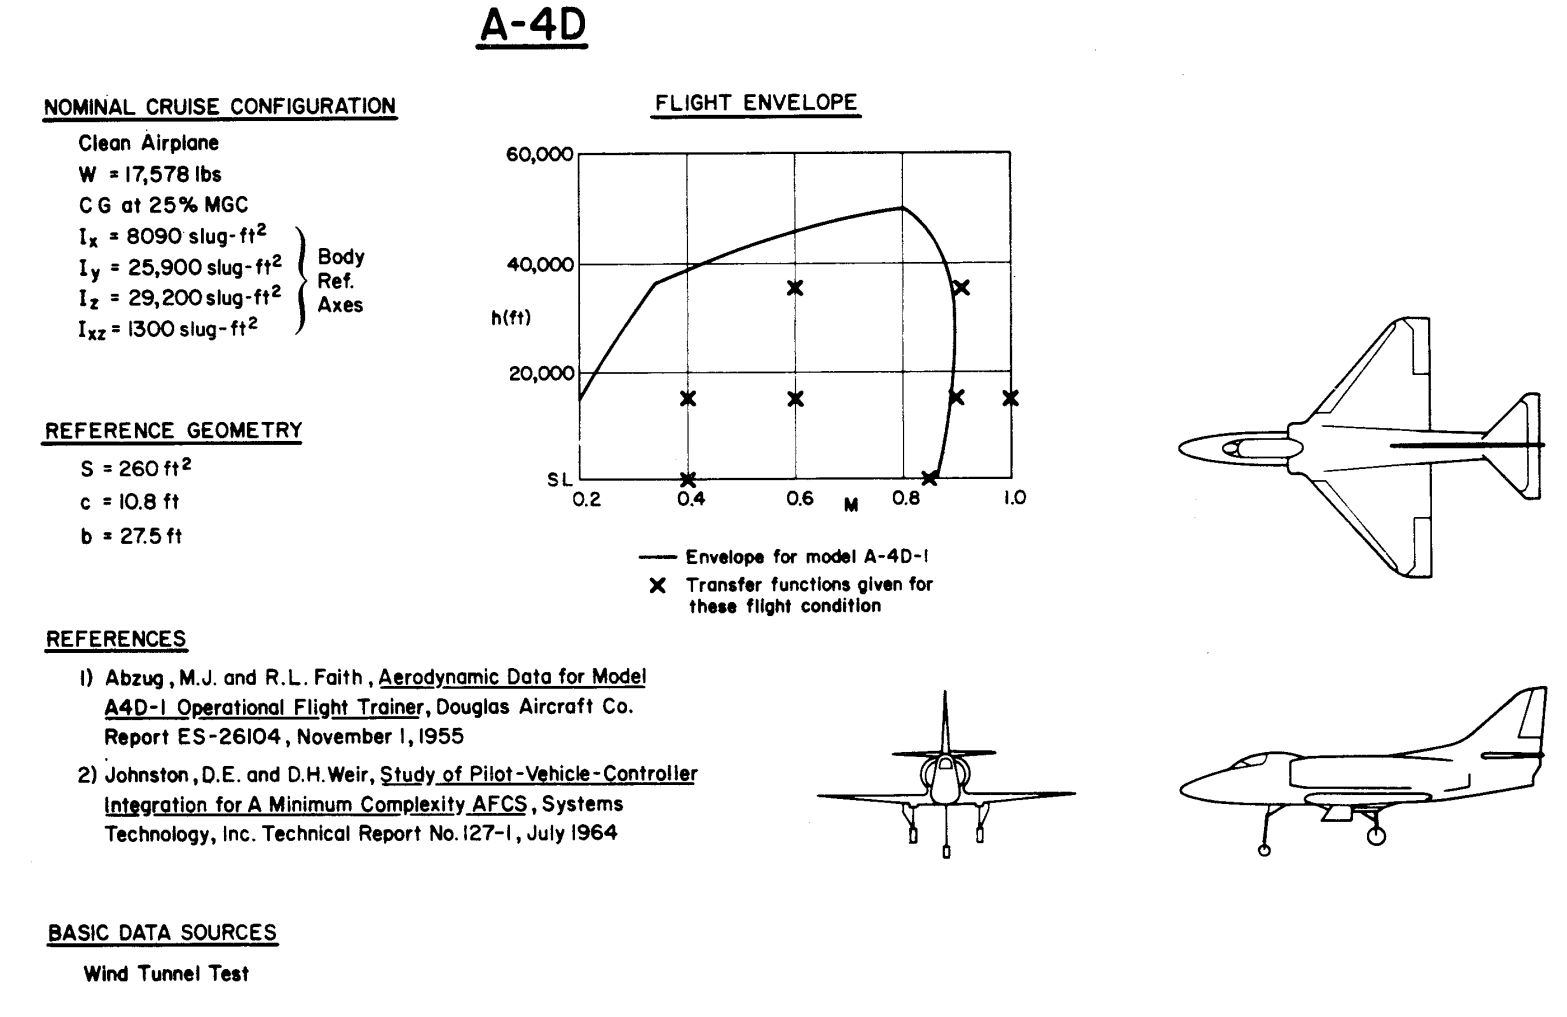

  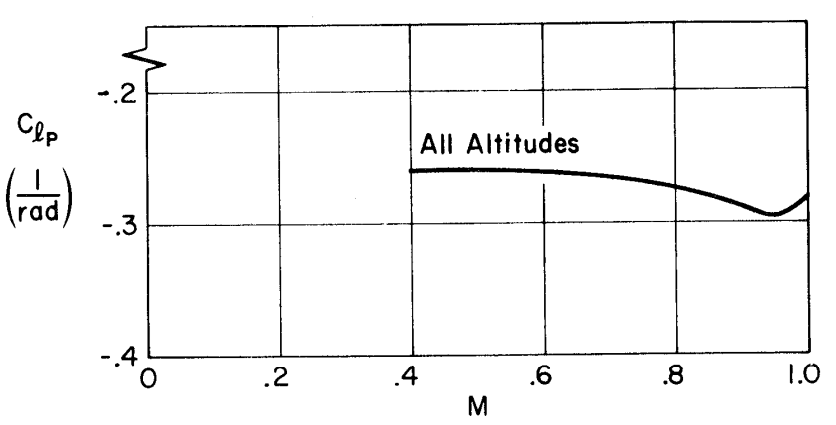

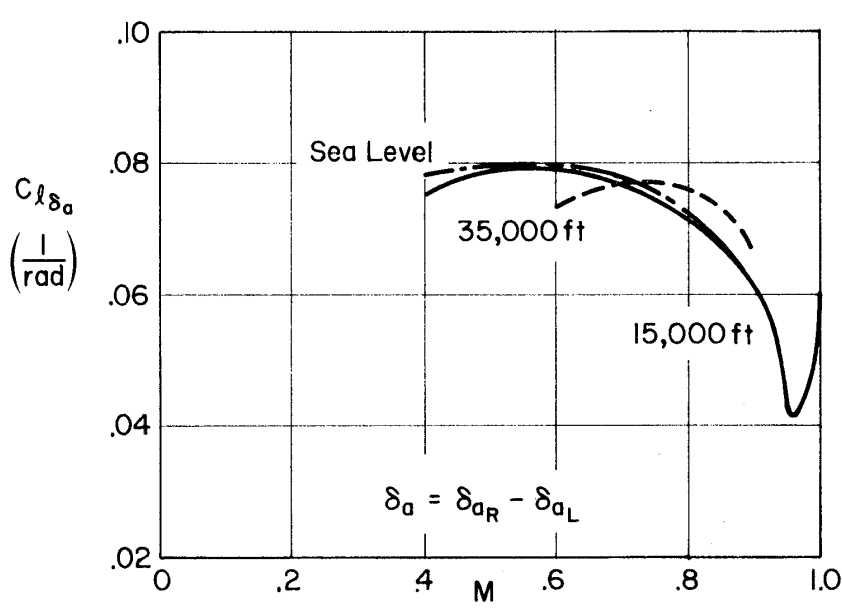

## Steady State Roll Rate Calculation

### Pure Rolling Motion

$\large L_p = C_{lp} \frac{b}{2u_0} \frac{QSb}{I_x} $

$\large L_{\delta a} = C_{l \delta a} \frac{QSb}{I_x} $

$\large \tau = -\frac{1}{L_p} $

$\large p(t) = -\frac{L_{\delta a}}{L_p} (1 - e^{-t/\tau}) \Delta \delta_a $

$\large p_{ss} = -\frac{L_{\delta a}}{L_p} \Delta \delta_a $

$\large p_{ss} = -\frac{2u_0}{b} \frac{C_{l \delta a}}{C_{lp}} \Delta \delta_a $

#### Geometry and Moment of Inertia

In [1]:
S = 24.2       # m^2
b = 8.4        # m
Ix = 10659     # kgm^2

# Max aileron deflection - TODO Need to determine what the max is
da = 18 * 0.017453  # rad

#### Calculation Functions

In [2]:
def rollTimeConstant(rho, u0, clp):
    Q = 0.5 * rho * u0**2
    L_p = clp * (b/(2*u0)) * ((Q*S*b)/Ix)
    return -1/L_p

In [3]:
def pss(u0, clda, clp, da):
    return -((2*u0)/b) * (clda/clp) * da

#### Test 1 - 350KIAS 15kft


In [4]:
# Coefficients for Mach 0.69 (350KIAS @ 15kft)
Cl_p = -0.27   # per rad
Cl_da = 0.077  # per rad

# Air data for Mach 0.69 (350KIAS @ 15kft)
rho = 0.77109  # kg/m^3
u0 = 221.604   # m/s

In [5]:
print(f'Roll time constant: {rollTimeConstant(rho, u0, Cl_p)}s')

Roll time constant: 0.5411978780018623s


In [6]:
print(f'Steady state roll rate: {pss(u0, Cl_da, Cl_p, da) * 57.29578} deg/s')

Steady state roll rate: 270.8447961573901 deg/s


#### Test 2 - 450KIAS 15kft

Note the changes in $C_{lp}$ and $C_{l\delta a}$ at Mach 0.87. 

In [7]:
# Coefficients for Mach 0.87 (450KIAS @ 15kft)
Cl_p = -0.28   # per rad
Cl_da = 0.065  # per rad

# Air data for Mach 0.87 (450KIAS @ 15kft)
rho = 0.77109  # kg/m^3
u0 = 281.402   # m/s

In [8]:
print(f'Roll time constant: {rollTimeConstant(rho, u0, Cl_p)}s')

Roll time constant: 0.41097199951766594s


In [9]:
print(f'Steady state roll rate: {pss(u0, Cl_da, Cl_p, da) * 57.29578} deg/s')

Steady state roll rate: 279.9615856103452 deg/s


**Plot roll rate versus time**

<IPython.core.display.Javascript object>


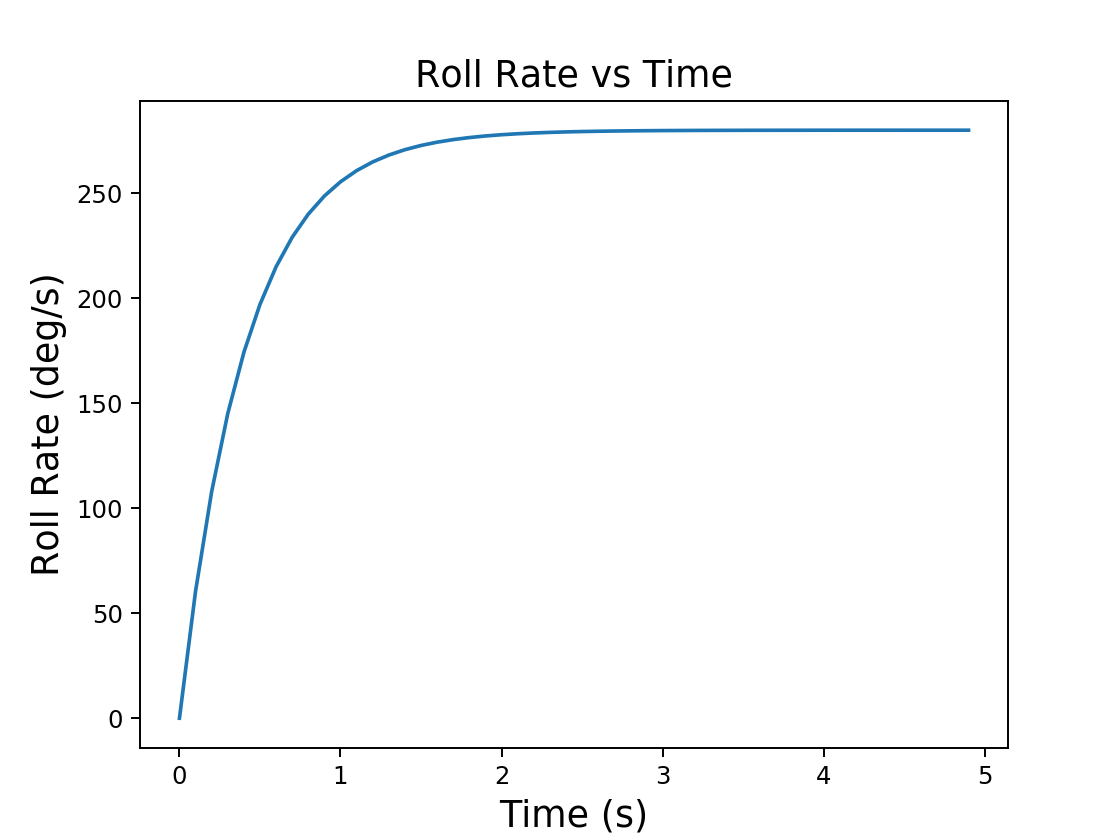

In [19]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

timeConstant = rollTimeConstant(rho, u0, Cl_p)
steadyStateRollRate = pss(u0, Cl_da, Cl_p, da)

rollRate = []
time = []

for t in np.arange(0, 5, 0.1):
    p = steadyStateRollRate * (1 - np.e**(-t/timeConstant))
    rollRate.append(p * 57.29578)
    time.append(t)
    
plt.figure()
plt.plot(time, rollRate)
plt.xlabel("Time (s)", fontsize=15)
plt.ylabel("Roll Rate (deg/s)", fontsize=15)
plt.title("Roll Rate vs Time", fontsize=15)
plt.show()

Need to find some documentation on the maximum aileron deflection angle.